# 1. Extraction 
Extract the data from year 2017 and construct the network of international trade based on “Total” value of export from the provided data.

In [49]:
#Define work directory 
import os
os.chdir("/Users/constancevandendorpe/")

In [38]:
#Import packages to import the csv datas 
import pandas as pd 
Data = pd.read_csv("/Users/constancevandendorpe/Python/data/international_trade_2004-2017.csv", index_col = 0)
Data2017 = Data[Data['Year'] == 2017]
#print(Data2017)
Data2017[:]

,Year,Reporter,Code_Reporter,Partner,Code_Partner,Animal,Vegetable,Food Products,Minerals,Fuels,...,Raw materials,Textiles,Chemical,Consumer goods,Intermediate goods,Fuel,Machinery and Transport Equipment,Agricultural Raw Materials,Capital goods,Total
0,2017,Albania,ALB,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.727865
1,2017,Albania,ALB,Anguila,AIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.885170
2,2017,Albania,ALB,United Arab Emirates,ARE,NaN,1.924542,3.468985,2033.804070,NaN,...,2033.804070,15.997397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12061.357502
3,2017,Albania,ALB,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,...,NaN,0.338268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.388126
4,2017,Albania,ALB,Australia,AUS,NaN,72.629302,NaN,26.154729,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2440.096577
5,2017,Albania,ALB,Austria,AUT,NaN,725.471563,NaN,582.051842,NaN,...,487.109270,1036.781523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35537.051577
6,2017,Albania,ALB,Azerbaijan,AZE,NaN,NaN,NaN,NaN,NaN,...,NaN,0.056260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.003716
7,2017,Albania,ALB,Belgium,BEL,NaN,26.892222,21.063122,146.580361,NaN,...,NaN,91.385938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10494.353420
8,2017,Albania,ALB,Bulgaria,BGR,NaN,5263.331841,834.831676,108.492027,NaN,...,5120.736114,3755.825505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73573.934401
9,2017,Albania,ALB,Bahrain,BHR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.392995


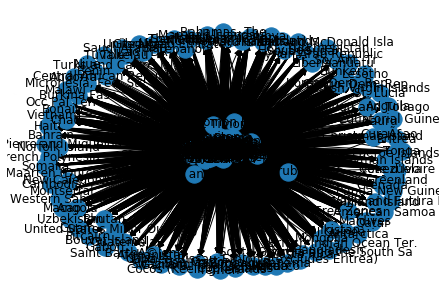

<Figure size 720x720 with 0 Axes>

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#The function "from_pandas_edgelist" returns a graph (G) from Pandas DataFrame containing an edge list
G = nx.from_pandas_edgelist(df = Data2017, source = 'Reporter', target = 'Partner', edge_attr = 'Total', create_using = nx.MultiDiGraph)
#A MultiDiGraph is a directed graph class that can store multiedges (several edges per couple of nodes)
nx.draw(G, with_labels = True)
fig = plt.figure(figsize=(10,10))
plt.show()

#Script to make the size of the arrows proportional to the exchange of money (but it takes like 10 minutes to 
#run and the arrows are too wide so we can't see anything ... )  

#Tott = [i['Total'] for i in dict(G.edges).values()]
#labels = [i for i in dict(G.nodes).keys()]
#labels = {i:i for i in dict(G.nodes).keys()}

#fig, ax = plt.subplots(figsize=(240,100))
#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
#nx.draw_networkx_edges(G, pos, width=Tott, ax=ax)
#_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)


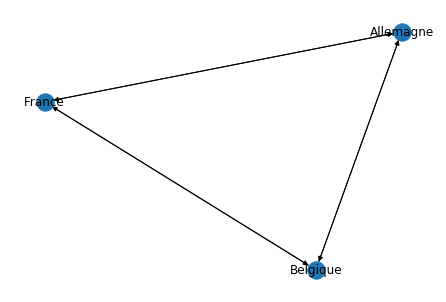

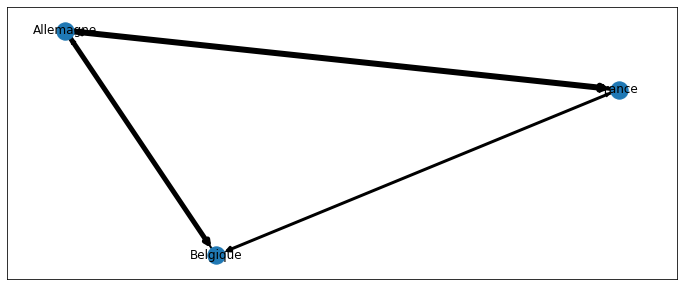

In [27]:
#Little script to show a little exemple with 3 countries : 
import pandas as pd 
edge = {'Reporter': ['Belgique','Belgique','France','France','Allemagne','Allemagne'], 'Partner': ['France','Allemagne','Belgique','Allemagne','Belgique','France'], 'Tot': [1,2,3,4,5,6]}
edge_df = pd.DataFrame(edge)
edge_df

G2 = nx.from_pandas_edgelist(edge_df, source = 'Reporter', target = 'Partner', edge_attr = 'Tot',create_using = nx.MultiDiGraph)
nx.draw(G2, with_labels = True)
plt.show()

Tott = [i['Tot'] for i in dict(G2.edges).values()]
labels = [i for i in dict(G2.nodes).keys()]
labels = {i:i for i in dict(G2.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G2, pos, width=Tott, ax=ax)
_ = nx.draw_networkx_labels(G2, pos, labels, ax=ax)

# 2. Community detection 
Run community detection on the symmetric part of the obtained network and compute modularity of the partition (for instance with the Louvain method, in this implementation: https://github.com/taynaud/python-louvain). 

Check consistency of partitions (ex: run 100 times with randomized node order, compare partitions with some index like Jaccard’s index or normalized mutual information or any other in http://www.comparingpartitions.info, check the robustness of the result).

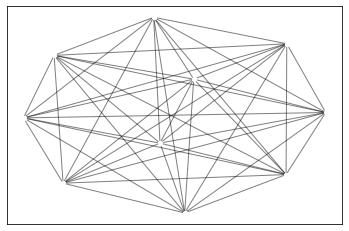

0.0

In [48]:
#Question : isn't the network entirely symmetric ? 

import sys
!{sys.executable} -m pip install python-louvain

import community
import networkx as nx
import matplotlib.pyplot as plt

# Replace this with your networkx graph loading depending on your format !
G = nx.erdos_renyi_graph(10,10)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

#Find modularity (from me)
mod = community.modularity(partition,G)
mod #Modularity of 0 ? 